In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [4]:
df = pd.read_csv('C:/Users/nikau/OneDrive/Desktop/IOD/DataSets/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
print(f'Original Dataset : {df.shape}')

# using a small portion of dataset 
df = df.head(1000)
print(f'Sample Dataset : {df.shape}')

Original Dataset : (568454, 10)
Sample Dataset : (1000, 10)


Thus, there are 10 columns out of which Score determines the review rating of food and Text describes the comment on that food.

# Quick EDA

In [7]:
# percentage composition of the sample dataset
percentage = (df['Score'].value_counts())/(np.sum(df['Score'].value_counts()))
percentage

5    0.642
4    0.138
1    0.098
3    0.075
2    0.047
Name: Score, dtype: float64

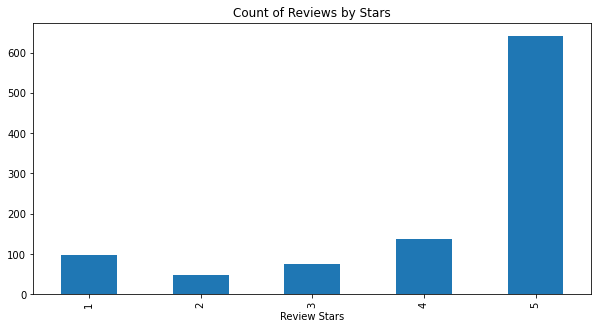

In [8]:
ax = df['Score'].value_counts().sort_index() \
        .plot(kind='bar',title='Count of Reviews by Stars',
             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

# Basic nltk

In [9]:
# taking random text as example
example = df['Text'][500]
example

"I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!"

In [10]:
# Tokenizing the example using nltk
tokens = nltk.word_tokenize(example)
tokens

['I',
 'bought',
 'these',
 'for',
 'the',
 'office',
 'and',
 'no',
 'one',
 'can',
 'put',
 'them',
 'down',
 '.',
 'I',
 "'m",
 'ordering',
 'more',
 'today',
 'and',
 'it',
 'has',
 'only',
 'been',
 '2',
 'weeks',
 '.',
 'Did',
 "n't",
 'have',
 'to',
 'shop',
 'for',
 'them',
 'either',
 ',',
 'Amazon',
 'brought',
 'it',
 'to',
 'my',
 'door',
 '!']

In [11]:
# declaring part of speech using pos_tag from nltk
tag = nltk.pos_tag(tokens)
tag

[('I', 'PRP'),
 ('bought', 'VBD'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('office', 'NN'),
 ('and', 'CC'),
 ('no', 'DT'),
 ('one', 'NN'),
 ('can', 'MD'),
 ('put', 'VB'),
 ('them', 'PRP'),
 ('down', 'RP'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('ordering', 'VBG'),
 ('more', 'JJR'),
 ('today', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('has', 'VBZ'),
 ('only', 'RB'),
 ('been', 'VBN'),
 ('2', 'CD'),
 ('weeks', 'NNS'),
 ('.', '.'),
 ('Did', 'VBP'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('shop', 'VB'),
 ('for', 'IN'),
 ('them', 'PRP'),
 ('either', 'DT'),
 (',', ','),
 ('Amazon', 'NNP'),
 ('brought', 'VBD'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('door', 'NN'),
 ('!', '.')]

# VADER Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
This uses a "bag of words" approach to classify the text.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
# checking polarity scores of some random text
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores(example)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

Thus, it states that the example taken above is much inclined towards negative side.

In [15]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [17]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plotting VADER results

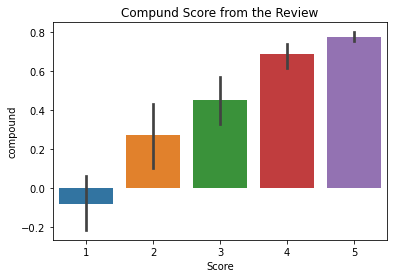

In [18]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score from the Review')
plt.show()

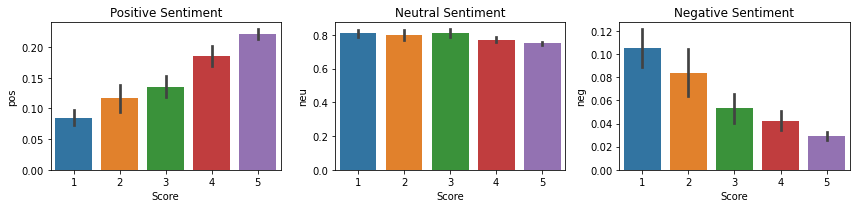

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')
plt.tight_layout()
plt.show()

# Pre-trained RoBERTa model

The benefits of utilizing Transformer model is that it accounts for not only the words but also the context related to other words.

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
# importing the pretrained model's learned weights
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

C:\Users\nikau\anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nikau\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [22]:
# Defining a polarity score calculator for RoBERTa
def roberta_polarity_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Error in loading for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Error in loading for id 83
Error in loading for id 187
Error in loading for id 529
Error in loading for id 540
Error in loading for id 746
Error in loading for id 863


In [24]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

# Comparing results from both the models

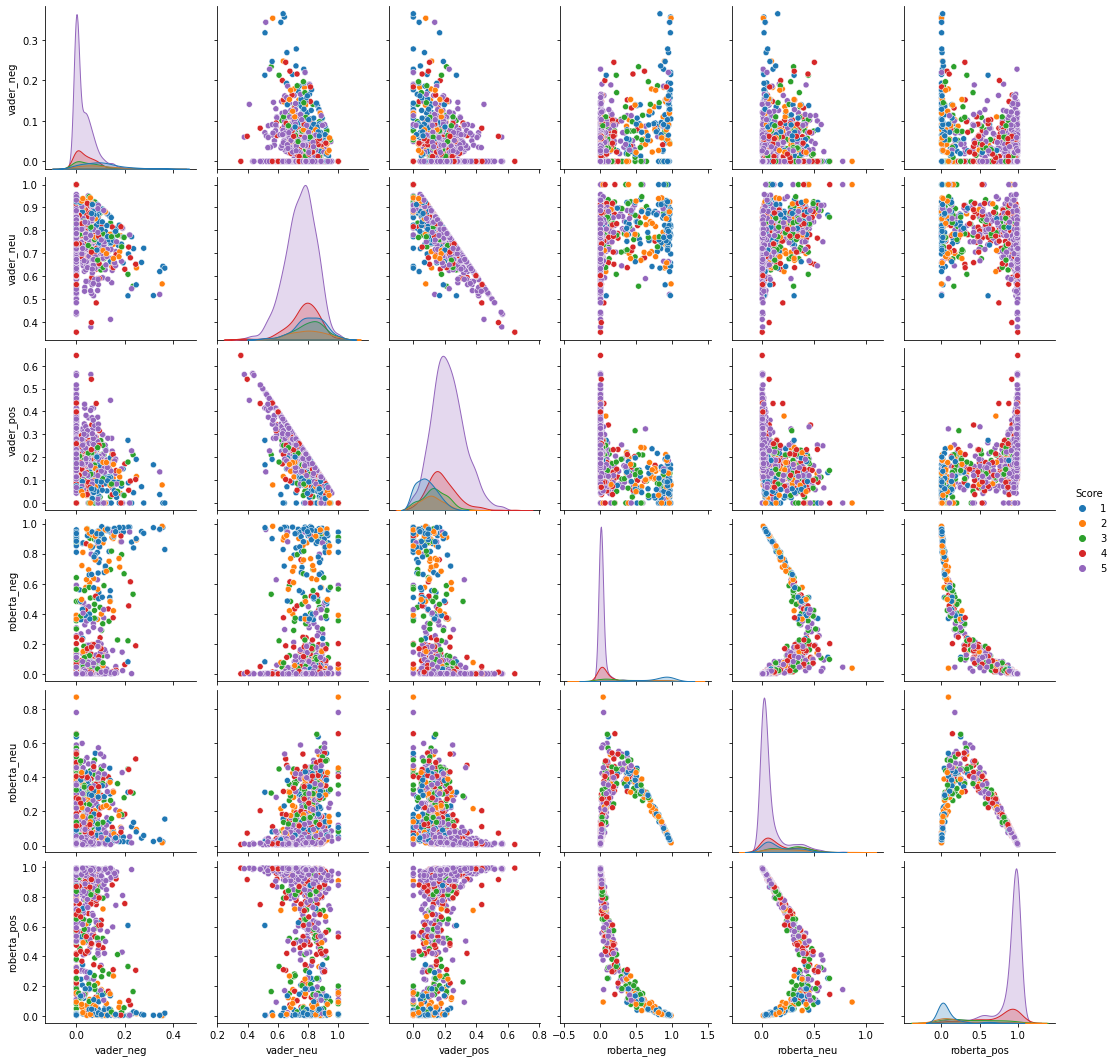

In [25]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

### Review Examples

In [26]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [27]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [28]:
# negative sentiment 5 star view

In [29]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [30]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra: Transformers Pipeline
 - quick and easy way to run sentiment predictions

In [31]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [32]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [33]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]